In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

# Discrete fourier transform
F-transform is used to decompose an image into its sine and cosine components. The output of the transformation represents the image in the Fourier of frequency domain, while input image is the spatial domain equivalent. In the Fourier domain, each point represents a particular frequency contained in the spatial domain image.

For a square size $N \times N$, the two-dimensional DFT is given by:
$$F(\theta, \xi) = \sum\limits_{k = 0}^{N - 1} \sum\limits_{l = 0}^{N - 1} f(k, l) \cdot e^{-\frac{2\pi i}{N} \cdot (k \theta + l \xi)}$$
where $f(a, b)$ is the image in the spatial domain and the exponential term is the basis function corresponding to each point $F(\theta, \xi)$ in the Fourier space. 

The basis function are sine and cosine waves with increasing frequencies, i.e. $F(0, 0)$ represents the DC-component of the image which corresponds to the average brightness and $F(N - 1, N - 1)$ represents the highest frequency.

The inverse Fourier transform is given by:
$$f(a, b) = \frac{1}{N^2} \sum\limits_{k = 0}^{N - 1} \sum\limits_{l = 0}^{N - 1} F(k, l) e^{\frac{2\pi i}{N} \cdot (k \cdot a + l \cdot b)}$$

In [44]:
# at the beginning we will check how fourier transform works with modeled image
x = np.arange(256)
y = np.sin(2 * np.pi * x / 4)
y += max(y)

(-0.5, 255.5, 255.5, -0.5)

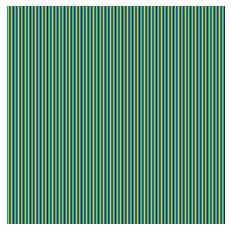

In [45]:
img = np.array([[y[j] * 127 for j in range(256)] for i in range(256)], dtype=np.uint8)
plt.imshow(img)
plt.axis("off")

In [46]:
dft_img = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_centered_img = np.fft.fftshift(dft_img)

magnitude_spectrum = np.log(1 + (cv2.magnitude(dft_centered_img[:, :, 0], dft_centered_img[:, :, 1])))

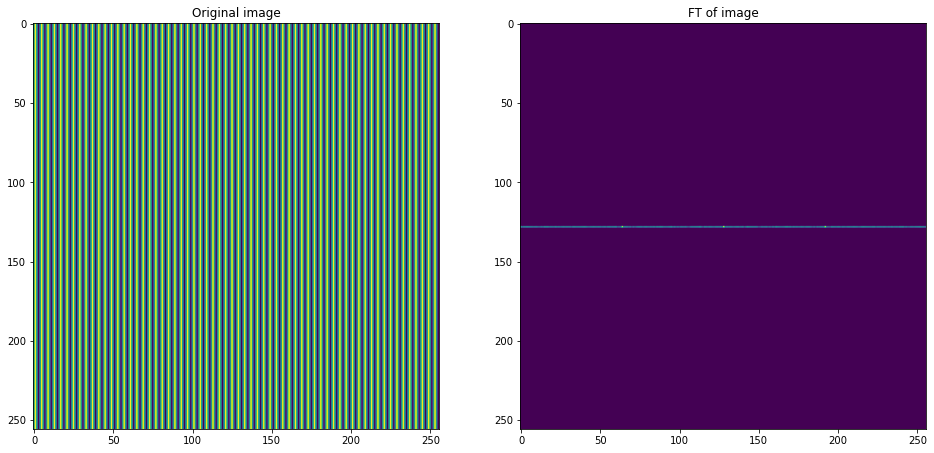

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(16, 12))

axs[0].imshow(img)
axs[0].title.set_text("Original image")

axs[1].imshow(magnitude_spectrum)
axs[1].title.set_text("FT of image")

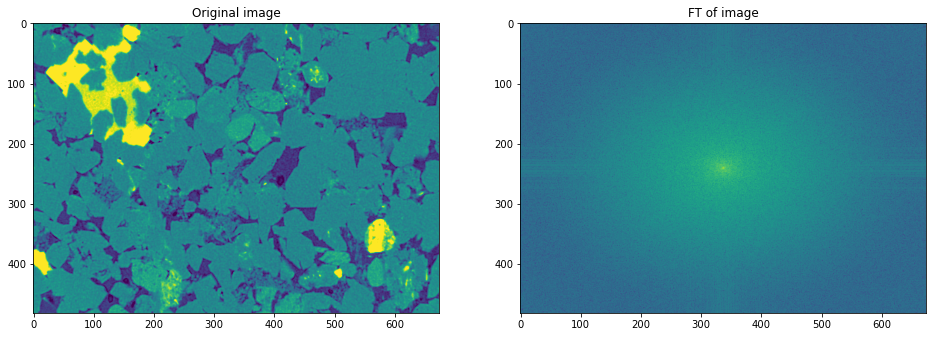

In [50]:
img = cv2.imread("../inpdata/images/sandstone.tif", 0)
dft_img = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_centered_img = np.fft.fftshift(dft_img)

magnitude_spectrum = np.log(1 + (cv2.magnitude(dft_centered_img[:, :, 0], dft_centered_img[:, :, 1])))

fig, axs = plt.subplots(1, 2, figsize=(16, 12))

axs[0].imshow(img)
axs[0].title.set_text("Original image")

axs[1].imshow(magnitude_spectrum)
axs[1].title.set_text("FT of image")

# Image filtering using Fourier transform

In [7]:
img = cv2.imread("../inpdata/images/sandstone.tif", 0)

In [8]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

In [10]:
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [11]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

In [12]:
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]

In [15]:
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r * r
mask[mask_area] = 0

In [19]:
fshift = dft_shift * mask
# fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

/tmp/ipykernel_1111/1745364948.py:2: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


In [20]:
f_ifshift = np.fft.ifftshift(fshift)

In [21]:
img_back = cv2.idft(f_ifshift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

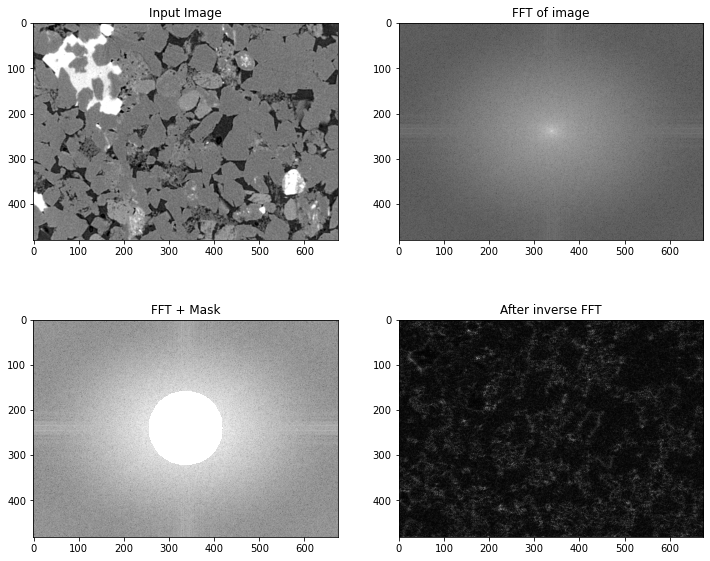

In [24]:
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

axs.flatten()[0].imshow(img, cmap="gray")
axs.flatten()[0].title.set_text("Input Image")

axs.flatten()[1].imshow(magnitude_spectrum, cmap="gray")
axs.flatten()[1].title.set_text("FFT of image")

axs.flatten()[2].imshow(fshift_mask_mag, cmap="gray")
axs.flatten()[2].title.set_text("FFT + Mask")

axs.flatten()[3].imshow(img_back, cmap="gray")
axs.flatten()[3].title.set_text("After inverse FFT")
